# Processing PubMed Articles Related To Covid 19

- https://www.december.com/html/spec/httpstat.html
- https://erilu.github.io/pubmed-abstract-compiler/
- https://www.ncbi.nlm.nih.gov/books/NBK25500/
- https://www.ncbi.nlm.nih.gov/books/NBK25499/
- https://www.nlm.nih.gov/bsd/mms/medlineelements.html

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from tqdm import tqdm
import time
from collections import Counter

import re
import requests
import urllib

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

plt.style.use('fivethirtyeight')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
file_path = "/content/drive/MyDrive/04-Work/EDA-Comparison-21st-Epidemics-PubMed/all-covid-19-pubmed-metadata.csv"

In [ ]:
covid_df = pd.read_csv(file_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204668 entries, 0 to 204667
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PMID    204668 non-null  object
 1   TI      204668 non-null  object
 2   AB      204668 non-null  object
 3   AD      204668 non-null  object
 4   FAU     204668 non-null  object
 5   DP      204668 non-null  object
 6   TA      204668 non-null  object
 7   JT      204668 non-null  object
 8   LA      204668 non-null  object
 9   MH      204668 non-null  object
 10  OAB     204668 non-null  object
 11  OT      204666 non-null  object
 12  PL      204668 non-null  object
 13  PST     204668 non-null  object
 14  PT      204668 non-null  object
 15  RN      204668 non-null  object
 16  SI      204668 non-null  object
dtypes: object(17)
memory usage: 26.5+ MB


In [ ]:
covid_df.head()

,PMID,TI,AB,AD,FAU,DP,TA,JT,LA,MH,OAB,OT,PL,PST,PT,RN,SI
0,35052023,Does a Mental Health Diagnosis Worsen Outcomes...,NONE,"Department of Psychiatry, Icahn School of Medi...","Vadukapuram, Ramu;Mansuri, Zeeshan;Trivedi, Ch...",2022 Jan 20,Prim Care Companion CNS Disord,The primary care companion for CNS disorders,eng,NONE,NONE,NONE,United States,epublish,Journal Article,NONE,NONE
1,35052021,The Opioid Epidemic and the COVID-19 Pandemic:...,NONE,"Department of Psychiatry, AdventHealth Orlando...","Das, Aparna;Padala, Akshay P;Wilson, Kerrie B",2022 Jan 20,Prim Care Companion CNS Disord,The primary care companion for CNS disorders,eng,NONE,NONE,NONE,United States,epublish,Journal Article,NONE,NONE
2,35052020,Has COVID-19 Complicated Eating Disorder Treat...,Objective: Recent evidence suggests psychosoci...,"Medical Department, Alsana, Thousand Oaks, Cal...","Mascolo, Margherita;Duffy, Mary E;Zehring, Bra...",2022 Jan 20,Prim Care Companion CNS Disord,The primary care companion for CNS disorders,eng,Comorbidity;Pandemics;Adult;*COVID-19;Humans;S...,NONE,NONE,United States,epublish,Journal Article,NONE,NONE
3,35051990,Neutralizing antibodies against the SARS-CoV-2...,The recent emergence of the SARS-CoV-2 Omicron...,"Howard Hughes Medical Institute, Chevy Chase, ...","Pearson, Claire;Grubaugh, Nathan D;Monteiro, V...",2022 Jan 20,Nat Med,Nature medicine,eng,NONE,NONE,NONE,United States,aheadofprint,Journal Article,NONE,NONE
4,35051989,Neutralizing antibodies against the SARS-CoV-2...,The Omicron variant is rapidly becoming the do...,"School of Public Health, LKS Faculty of Medici...","Chen, Chunke;Chan, Karl C K;Lau, Eric H Y;Lam,...",2022 Jan 20,Nat Med,Nature medicine,eng,NONE,NONE,NONE,United States,aheadofprint,Journal Article,NONE,NONE


## Authors

In [ ]:
authors_counts = list()
below_75_authors_counts = list()
above_75_authors_counts = list()

for authors in covid_df.FAU:
  count = len(authors.split(';'))
  authors_counts.append(count)
  if count<=8:
    below_75_authors_counts.append(count)
  else:
    above_75_authors_counts.append(count)

In [ ]:
covid_df['FAU_Count']=authors_counts

In [ ]:
covid_df.describe()

,FAU_Count
count,204668.000000
mean,6.648450
std,7.583089
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,1016.000000


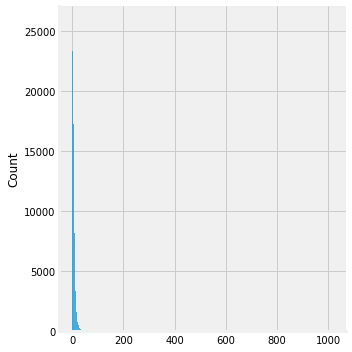

In [ ]:
sns.displot(x=authors_counts, discrete=True)

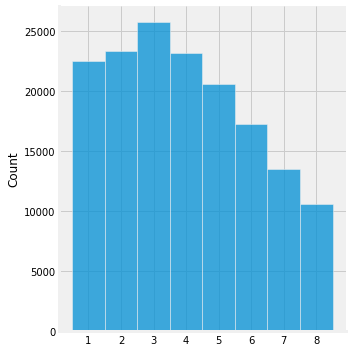

In [ ]:
sns.displot(x=below_75_authors_counts, discrete=True)

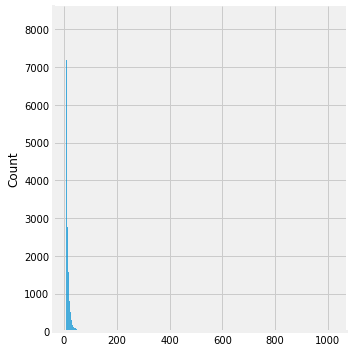

In [ ]:
sns.displot(x=above_75_authors_counts, discrete=True)

## Journal Title (JT) & Abbreviation (TA)

In [ ]:
covid_df.TA.value_counts()

Int J Environ Res Public Health    3074
PLoS One                           2684
BMJ                                2325
Cureus                             1522
Sci Rep                            1487
                                   ... 
Rev Comun Salud                       1
Int J Psychophysiol                   1
Cancer Genomics Proteomics            1
Blood Press Monit                     1
Annu Rev Biomed Data Sci              1
Name: TA, Length: 7717, dtype: int64

In [ ]:
jounl_count = Counter(covid_df.TA, )
jounl_count_list = list(jounl_count.most_common())

# Plot
names = [value for value, count in jounl_count_list[0:15]]
counts = [count for value, count in jounl_count_list[0:15]]

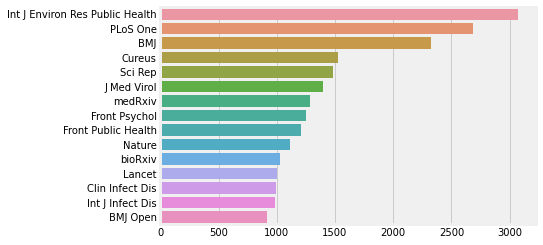

In [ ]:
sns.barplot(x=counts, y=names)

In [ ]:
len(covid_df.JT.value_counts())

7703

## Language (LA)

In [ ]:
covid_df.LA.value_counts()

eng            196778
spa              1516
ger              1082
eng;spa          1067
fre              1065
chi               858
eng;por           708
rus               290
ita               269
por               131
jpn               118
dut               114
hun                83
eng;nor            81
nor                69
eng;chi            63
dan                59
eng;por;spa        49
swe                42
heb                39
pol                31
tur                30
eng;fre            26
ger;eng            21
ice                17
kor                14
eng;pol            11
eng;rus             9
tur;eng             7
epo                 6
cze                 5
gre;eng             3
NONE                2
eng;gre             2
eng;ukr             1
eng;hrv             1
eng;kor             1
Name: LA, dtype: int64

## Publication Type

In [ ]:
temp_ = list()
for date in covid_df.PT:
  for text in date.split(';'):
    temp_.append(text.strip())

print(len(temp_))

print(len(set(temp_)))

pub_type_count = Counter(temp_)
pub_type_count_list = list(pub_type_count.most_common())

# Plot
names = [value for value, count in pub_type_count_list[0:20]]
counts = [count for value, count in pub_type_count_list[0:20]]    

297431
68


Text(0.5, 0, 'Count')

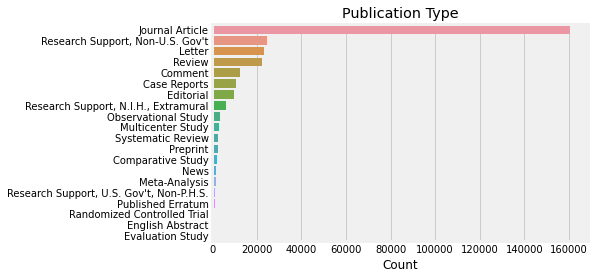

In [ ]:
sns.barplot(x=counts, y=names)
plt.title("Publication Type")
plt.xlabel("Count")

## Publication Date (DP)

In [ ]:
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

cov_pub_2019 = list()
cov_pub_2020= list()
cov_pub_2021= list()


for date in (covid_df.DP):

  if len(date.split())>1:
    year = date.split()[0]
    month = date.split()[1].split('-')[0]

    if month in month_abbr and int(year)==2019:
      cov_pub_2019.append(f"{month}-{year}")      

    if month in month_abbr and int(year)==2020:
      cov_pub_2020.append(f"{month}-{year}")  

    if month in month_abbr and int(year)==2021:
      cov_pub_2021.append(f"{month}-{year}")              

In [ ]:
year_2019 = ['Jan-2019', 'Feb-2019', 'Mar-2019', 
             'Apr-2019', 'May-2019', 'Jun-2019', 
             'Jul-2019', 'Aug-2019', 'Sep-2019', 
             'Oct-2019', 'Nov-2019', 'Dec-2019']

year_2020 = ['Jan-2020', 'Feb-2020', 'Mar-2020', 
             'Apr-2020', 'May-2020', 'Jun-2020', 
             'Jul-2020', 'Aug-2020', 'Sep-2020', 
             'Oct-2020', 'Nov-2020', 'Dec-2020']

year_2021 = ['Jan-2021', 'Feb-2021', 'Mar-2021', 
             'Apr-2021', 'May-2021', 'Jun-2021', 
             'Jul-2021', 'Aug-2021', 'Sep-2021', 
             'Oct-2021', 'Nov-2021', 'Dec-2021']              

Text(0.5, 1.0, 'Publication Count Per-Month of 2019')

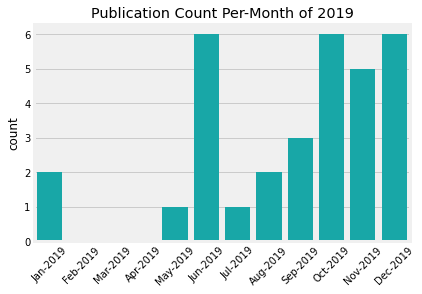

In [ ]:
sns.countplot(x=cov_pub_2019, order=year_2019, color="c")
plt.xticks(rotation=45)
plt.title("Publication Count Per-Month of 2019")

Text(0.5, 1.0, 'Publication Count Per-Month of 2020')

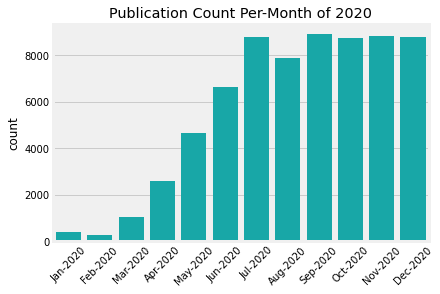

In [ ]:
sns.countplot(x=cov_pub_2020, order=year_2020, color="c")
plt.xticks(rotation=45)
plt.title("Publication Count Per-Month of 2020")

Text(0.5, 1.0, 'Publication Count Per-Month of 2021')

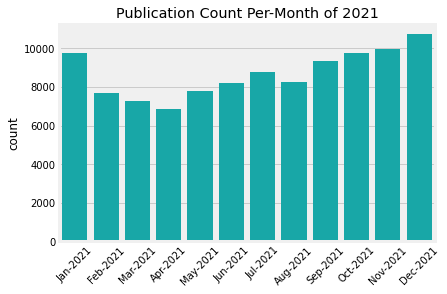

In [ ]:
sns.countplot(x=cov_pub_2021, order=year_2021, color="c")
plt.xticks(rotation=45)
plt.title("Publication Count Per-Month of 2021")

## Publication Location (PL)

In [ ]:
covid_df.PL.value_counts()

United States           69463
England                 52455
Switzerland             20000
Netherlands             14903
Germany                  7033
                        ...  
Estonia                     1
Cham (CH)                   1
Southampton (UK)            1
Copenhagen (Denmark)        1
South Dartmouth (MA)        1
Name: PL, Length: 98, dtype: int64

## Publication Status (PST)

In [ ]:
covid_df.PST.value_counts()

ppublish        123219
epublish         58761
aheadofprint     22530
NONE               158
Name: PST, dtype: int64

## Enzyme (RN)

In [ ]:
enzymes_molecule = list()

for ec_number_molecules in (covid_df.RN):
  if isinstance(ec_number_molecules, str):
    for molecule in ec_number_molecules.split(';'):
      if molecule.startswith('EC'):
        enzymes_molecule.append(molecule)  

In [ ]:
enzymes_molecule_count = Counter(enzymes_molecule, )

In [ ]:
len(enzymes_molecule)

13529

In [ ]:
len(enzymes_molecule_count.most_common())

891

- There are total 13172 enzymes mentioned.
- Among that, 869 are most common occuring.

### Occurance count 

In [ ]:
enzymes_molecule_count.most_common()[:10]

[('EC 3.4.17.23 (Angiotensin-Converting Enzyme 2)', 2907),
 ('EC 3.4.17.23 (ACE2 protein, human)', 2338),
 ('EC 3.4.15.1 (Peptidyl-Dipeptidase A)', 1346),
 ('EC 3.4.21.- (Serine Endopeptidases)', 539),
 ('EC 3.4.21.- (TMPRSS2 protein, human)', 483),
 ('EC 3.4.22.28 (Coronavirus 3C Proteases)', 474),
 ('EC 1.1.1.27 (L-Lactate Dehydrogenase)', 208),
 ('EC 2.7.7.48 (RNA-Dependent RNA Polymerase)', 201),
 ('EC 3.4.22.- (3C-like proteinase, SARS-CoV-2)', 183),
 ('EC 3.4.17.23 (Ace2 protein, mouse)', 149)]

In [ ]:
enzyme_classes = {
    '1':'Oxidoreductases',
    '2':'Transferases',
    '3':'Hydrolases',
    '4':'Lyases',
    '5':'Isomerases',
    '6':'Ligases',
    '7':'Translocases',
}

In [ ]:
enzyme_classes_count = list()
for enzyme_name in list(enzymes_molecule_count.keys()):
  class_enzyme = enzyme_name.split()[1]
  for enzyme_class_no in enzyme_classes.keys():
    if class_enzyme.startswith(enzyme_class_no):
      enzyme_classes_count.append(enzyme_classes.get(enzyme_class_no))

In [ ]:
enzyme_classes_count = Counter(enzyme_classes_count, )
enzyme_classes_count = dict(enzyme_classes_count.most_common())


In [ ]:
enzyme_classes_count

{'Hydrolases': 383,
 'Isomerases': 12,
 'Ligases': 16,
 'Lyases': 16,
 'Oxidoreductases': 135,
 'Transferases': 324,
 'Translocases': 5}

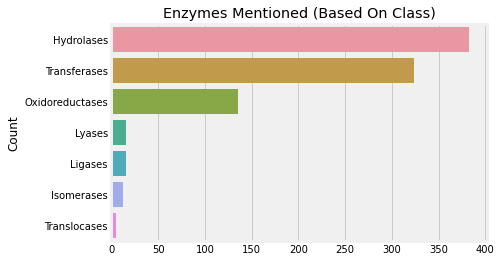

In [ ]:
sns.barplot(x=list(enzyme_classes_count.values()), y=list(enzyme_classes_count.keys()))
plt.title("Enzymes Mentioned (Based On Class)")
plt.ylabel("Count")
plt.show()

## Secondary Source

In [ ]:
data_source = pd.read_csv("/content/drive/MyDrive/04-Work/EDA-Comparison-21st-Epidemics-PubMed/MEDLINE-databank-sources-p-1 - Sheet1.csv")

In [ ]:
covid_source_item = ['Non-CT' for x in range(len(covid_df))]

In [ ]:
just_names = list()

for idx, source in enumerate(covid_df.SI):
  if source.strip() != 'NONE':
    for item in list(data_source['Trial Registry Abbreviation']) :
      if item in source.strip():
        covid_source_item[idx]=item.split('.')[0]
        just_names.append(item.split('.')[0])

In [ ]:
len(just_names)

1454

Text(0.5, 1.0, 'Clinical Trails Registry Count')

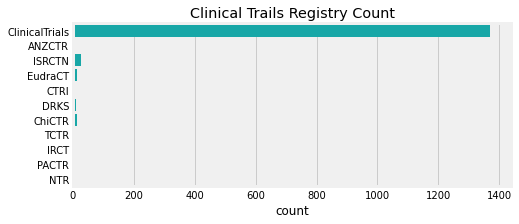

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y=just_names,  color="c")
plt.title("Clinical Trails Registry Count")

In [ ]:
covid_source_item_count = Counter(covid_source_item, )
list(covid_source_item_count.most_common())

[('Non-CT', 203234),
 ('ClinicalTrials', 1355),
 ('ISRCTN', 27),
 ('ChiCTR', 13),
 ('EudraCT', 12),
 ('DRKS', 11),
 ('ANZCTR', 6),
 ('CTRI', 4),
 ('IRCT', 3),
 ('TCTR', 1),
 ('PACTR', 1),
 ('NTR', 1)]

In [ ]:
names = [value for value, count in list(covid_source_item_count.most_common())[2:]]
counts = [count for value, count in list(covid_source_item_count.most_common())[2:]]
counts

[27, 13, 12, 11, 6, 4, 3, 1, 1, 1]

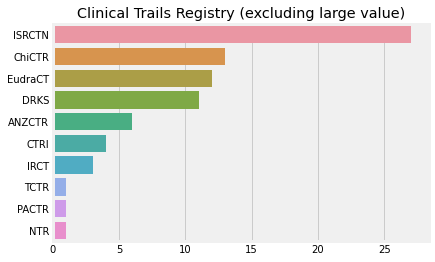

In [ ]:
sns.barplot(x=counts, y=names)
plt.title("Clinical Trails Registry (excluding large value)")
plt.show()

In [ ]:
path = "/content/drive/MyDrive/04-Work/EDA-Comparison-21st-Epidemics-PubMed/MEDLINE-databank-sources-p-1 - databases.csv"

data_source_db = pd.read_csv(path)

In [ ]:
covid_source_db = list()
for item in list(data_source_db['MEDLINE Databank Name Abbreviation']):
  for source in covid_df.SI:
    if item in source.strip():
      covid_source_db.append(item)

In [ ]:
covid_source_db_item_count = Counter(covid_source_db, )
covid_source_db_item_count.most_common()

[('figshare', 268),
 ('Dryad', 43),
 ('GENBANK', 15),
 ('GEO', 15),
 ('PDB', 10),
 ('RefSeq', 7),
 ('SRA', 3),
 ('BioProject', 1),
 ('dbGaP', 1)]

In [ ]:
names = [value for value, count in list(covid_source_db_item_count.most_common())]
counts = [count for value, count in list(covid_source_db_item_count.most_common())]
counts

[268, 43, 15, 15, 10, 7, 3, 1, 1]

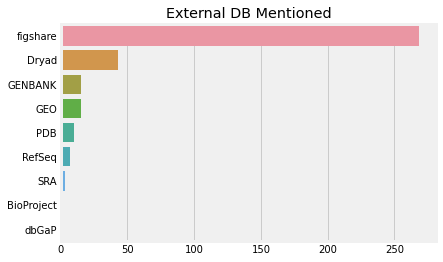

In [ ]:
sns.barplot(x=counts, y=names)
plt.title("External DB Mentioned")
plt.show()

## Citations

In [ ]:
def get_citation(pmid):

  url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id={pmid}"

  url_result = urllib.request.urlopen(url)

  esearch_url_result = url_result.read().decode('utf-8')

  pmids = set(re.findall("<Id>(\d+?)</Id>", esearch_url_result))

  return pmids

In [ ]:
covid_df['PMID']

0         35052023
1         35052021
2         35052020
3         35051990
4         35051989
            ...   
204663    29634173
204664    29261939
204665    28262332
204666    15631713
204667    14648488
Name: PMID, Length: 204668, dtype: object

In [ ]:
citations_count = dict()

for pmid in tqdm(covid_df['PMID'][0:10000]):
  citations_count[pmid] = get_citation(str(pmid))
  time.sleep(0.30)

  6%|▌         | 596/10000 [07:05<1:52:00,  1.40it/s]


KeyboardInterrupt: ignored

In [ ]:
get_citation('30713326')

{'30713326',
 '31654456',
 '31879536',
 '32552502',
 '33708064',
 '33976418',
 '34052827',
 '34750548',
 '34758732',
 '35071782'}